# <center> Лабороторна робота 2 </center>
# <center> Кошовий Максим КС42 </center>
### Winner Round Classification 
[source of data](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)

## 0. Import dependencies

In [151]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

# For Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## 1. Load Data

In [152]:
dataframe=pd.read_csv("./src/csgo_round_snapshots.csv")
# Dataset Summary
dataframe.head(20)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## 2-3. Visualize and Prepare the data

In [153]:
df = dataframe.copy()

cols_weapon = 'weapon'
cols_grenade = 'grenade'

df = df.drop(df.columns[df.columns.str.contains(cols_weapon)], axis=1)
df = df.drop(df.columns[df.columns.str.contains(cols_grenade)], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           122410 non-null  float64
 3   map               122410 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          122410 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        122410 non-null  float64
 12  t_helmets         122410 non-null  float64
 13  ct_defuse_kits    122410 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122410 non-null  float64
 16  round_winner      12

In [154]:
df.isnull().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
round_winner        0
dtype: int64

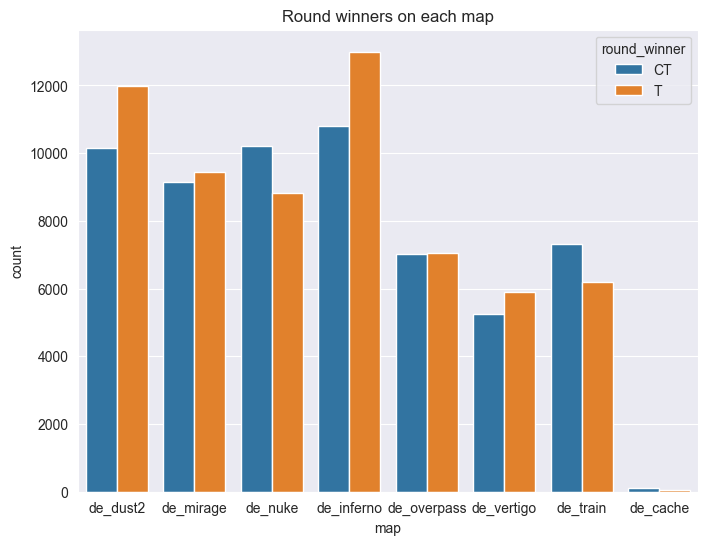

In [155]:
# Round wins on maps
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=df, palette=["#1f77b4", "#ff7f0e"])
ax.set(title='Round winners on each map')
plt.show()

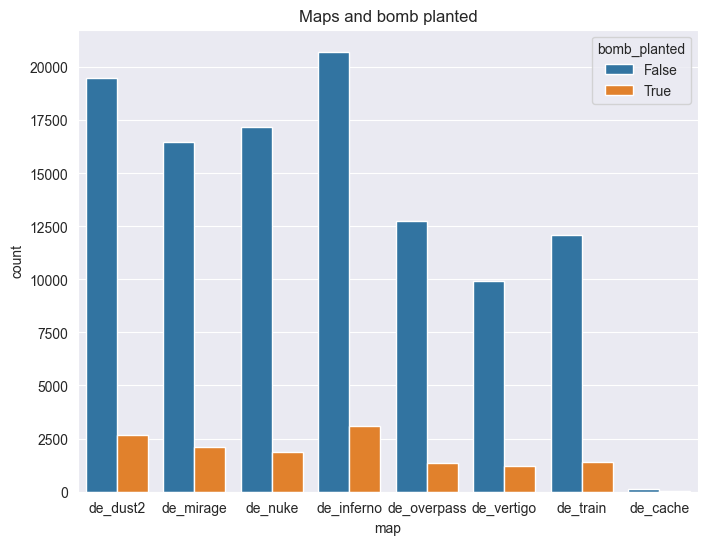

In [156]:
# Frequency of bomb planted on maps
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df, palette=["#1f77b4", "#ff7f0e"])
ax.set(title='Maps and bomb planted')
plt.show()

<Axes: xlabel='t_armor', ylabel='Count'>

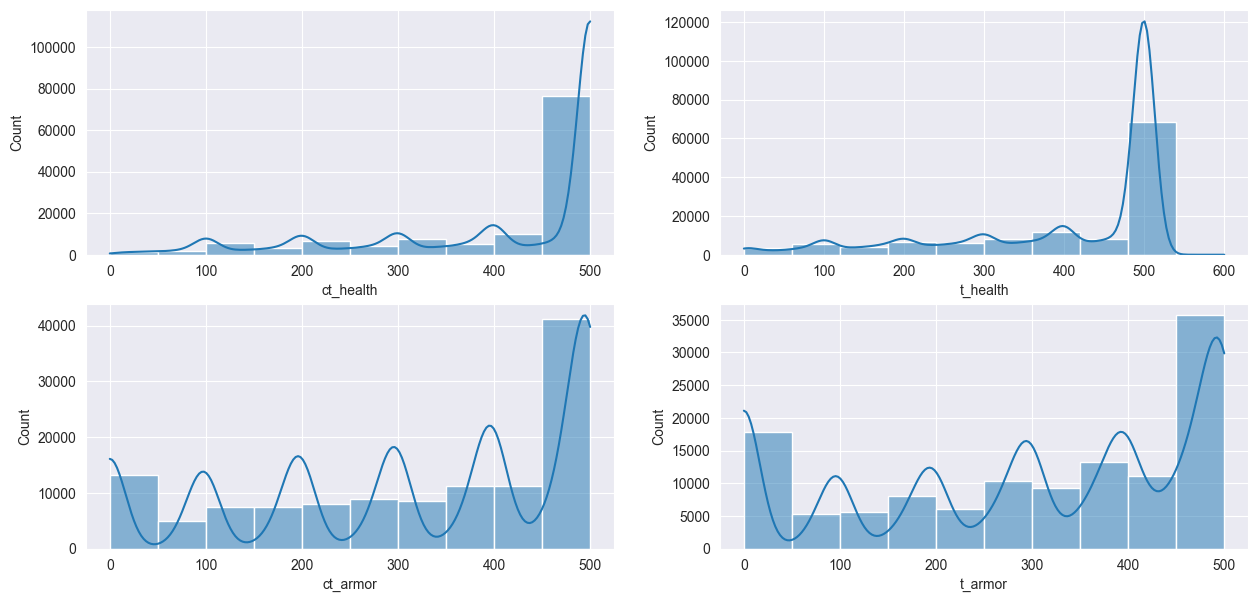

In [157]:
# Plot the distribution of health
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,7))
axes = axes.flatten()
sns.histplot(df['ct_health'], bins=10, ax=axes[0], kde=True)
sns.histplot(df['t_health'], bins=10, ax=axes[1], kde=True)
sns.histplot(df['ct_armor'], bins=10, ax=axes[2], kde=True)
sns.histplot(df['t_armor'], bins=10, ax=axes[3], kde=True)

<Axes: xlabel='t_money', ylabel='Count'>

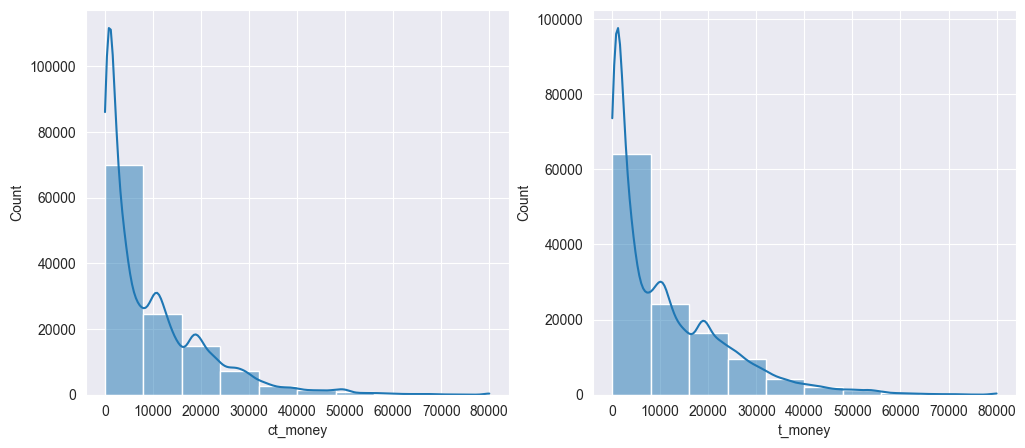

In [158]:
# Plot the distribution of money
fig2, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.histplot(df['ct_money'], bins=10, ax=ax1, kde=True)
sns.histplot(df['t_money'], bins=10, ax=ax2, kde=True)

In [159]:
# Make data more Gaussian-like
pt = PowerTransformer(method='yeo-johnson')

qt = QuantileTransformer(output_distribution='normal', random_state=0)

cols_yeo = ['ct_money', 't_money']

cols_quatile = ['ct_health', 't_health']

for col in cols_yeo:
    df[col] = pt.fit_transform(df[[col]])
    
for col in cols_quatile:
    df[col] = qt.fit_transform(df[[col]])

<Axes: xlabel='t_money', ylabel='Count'>

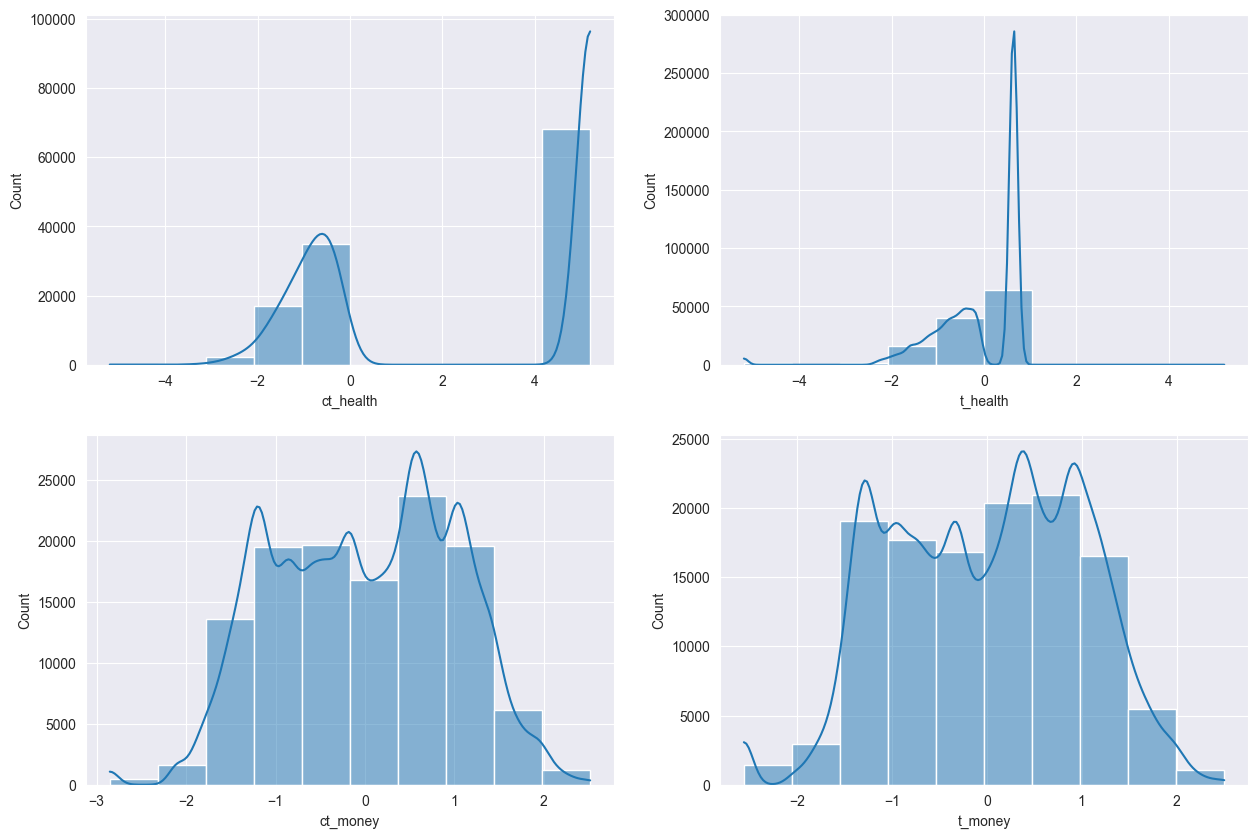

In [160]:
# Make plots again to see result
fig3, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
axes = axes.flatten()
sns.histplot(df['ct_health'], bins=10, ax=axes[0], kde=True)
sns.histplot(df['t_health'], bins=10, ax=axes[1], kde=True)
sns.histplot(df['ct_money'], bins=10, ax=axes[2], kde=True)
sns.histplot(df['t_money'], bins=10, ax=axes[3], kde=True)

## 4. Prepare Data

In [161]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['map'] = label_encoder.fit_transform(df['map'])
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])
df.head(20)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,round_winner
0,175.00,0.0,0.0,1,0,5.199338,0.637923,0.0,0.0,-0.174067,-0.317405,0.0,0.0,0.0,5.0,5.0,CT
1,156.03,0.0,0.0,1,0,5.199338,0.637923,400.0,300.0,-1.213966,-1.247478,0.0,0.0,1.0,5.0,5.0,CT
2,96.03,0.0,0.0,1,0,-0.598435,-0.412900,294.0,200.0,-1.111004,-1.350429,0.0,0.0,1.0,4.0,4.0,CT
3,76.03,0.0,0.0,1,0,-0.598435,-0.412900,294.0,200.0,-1.111004,-1.350429,0.0,0.0,1.0,4.0,4.0,CT
4,174.97,1.0,0.0,1,0,5.199338,0.637923,192.0,0.0,0.995791,0.394170,0.0,0.0,1.0,5.0,5.0,CT
5,114.97,1.0,0.0,1,0,5.199338,0.637923,500.0,0.0,-0.675631,0.378971,5.0,0.0,1.0,5.0,5.0,CT
6,94.97,1.0,0.0,1,0,-0.922330,-1.495054,296.0,0.0,-0.691768,-0.171628,3.0,0.0,0.0,3.0,2.0,CT
7,74.97,1.0,0.0,1,0,-0.922330,-1.495054,296.0,0.0,-0.691768,-0.171628,3.0,0.0,0.0,3.0,2.0,CT
8,54.97,1.0,0.0,1,0,-1.046576,-1.756055,269.0,0.0,-0.518833,-0.503789,3.0,0.0,0.0,3.0,1.0,CT
9,174.97,2.0,0.0,1,0,5.199338,0.637923,196.0,0.0,1.063968,1.091964,2.0,0.0,0.0,5.0,5.0,CT


In [162]:
winner_mapping = {
    0: "CT",
    1: "T",
}
rev_winner_mapping = {val: key for key, val in winner_mapping.items()}

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["time_left", "round_winner"], axis=1), 
    df["round_winner"].map(rev_winner_mapping), 
    test_size=0.2, random_state=1337,
)

## 5. Train & Test various classification models

### 5.1 Naive Bayes

In [163]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [164]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7363879585001225; Test acc 0.7378890613511968


In [165]:
print(report)

              precision    recall  f1-score   support

          CT       0.72      0.77      0.74     11990
           T       0.76      0.71      0.73     12492

    accuracy                           0.74     24482
   macro avg       0.74      0.74      0.74     24482
weighted avg       0.74      0.74      0.74     24482



Text(627.9949494949494, 0.5, 'True')

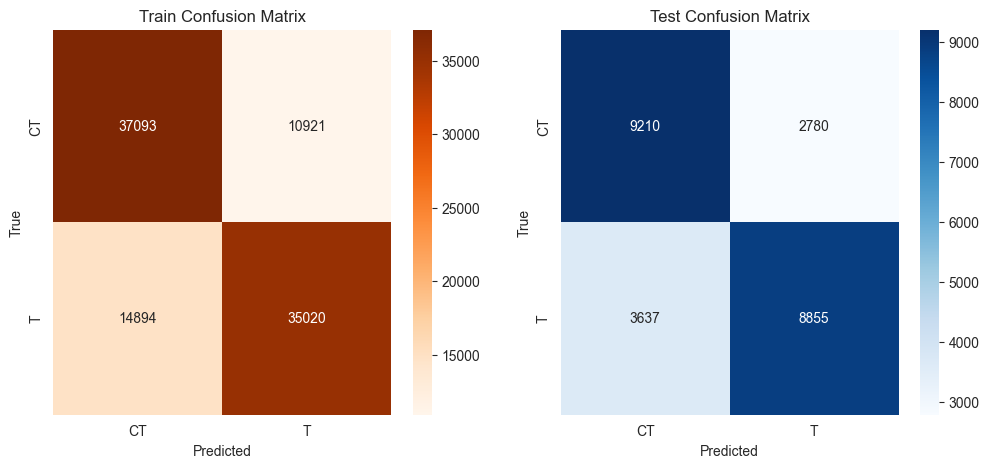

In [166]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.2 Logistic Regression Classifier

In [167]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [168]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7465076382648477; Test acc 0.7490809574381178


In [169]:
print(report)

              precision    recall  f1-score   support

          CT       0.74      0.74      0.74     11990
           T       0.75      0.76      0.75     12492

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



Text(627.9949494949494, 0.5, 'True')

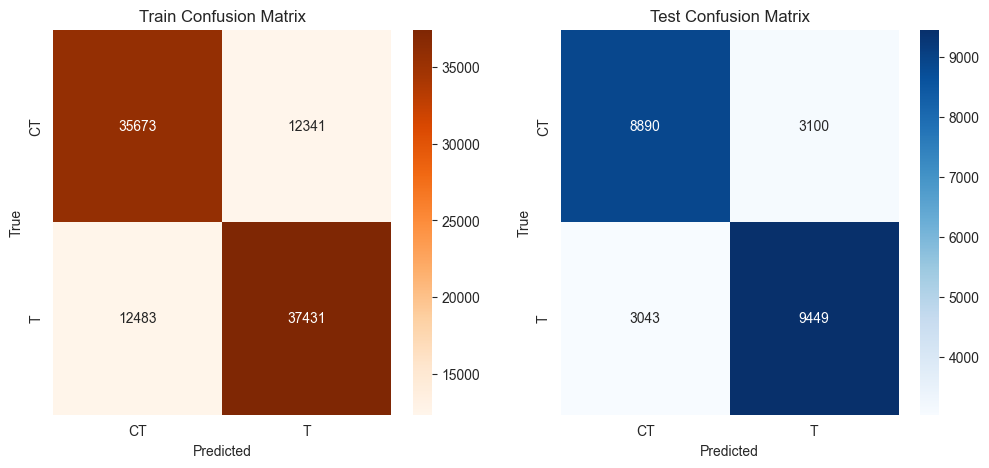

In [170]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.3 Decision Tree

In [171]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=25)

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [172]:
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.9916469242708928; Test acc 0.8333877951147782


In [173]:
print(report)

              precision    recall  f1-score   support

          CT       0.83      0.83      0.83     11990
           T       0.83      0.84      0.84     12492

    accuracy                           0.83     24482
   macro avg       0.83      0.83      0.83     24482
weighted avg       0.83      0.83      0.83     24482



Text(627.9949494949494, 0.5, 'True')

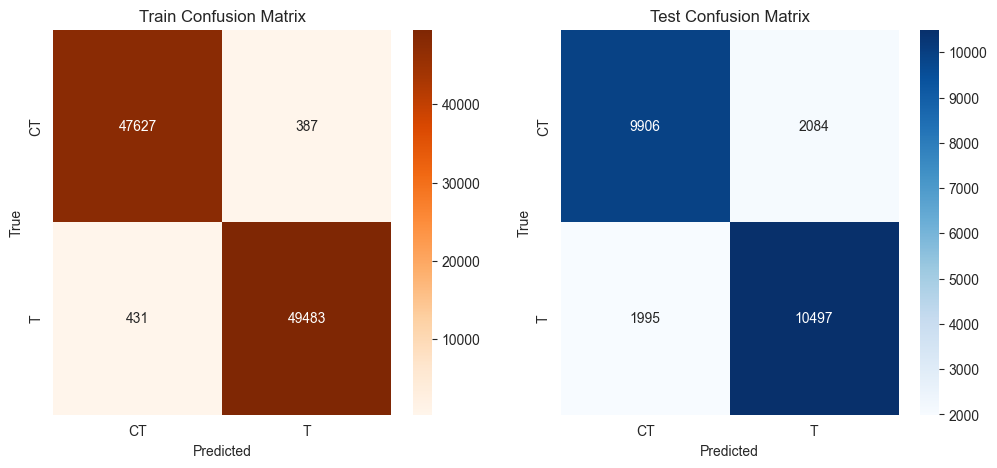

In [174]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.4. RandomForestClassifier

In [175]:
rf_cl = RandomForestClassifier(random_state=25)

# Train the classifier
rf_cl.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

In [176]:
y_pred_train = rf_cl.predict(X_train)
y_pred_test = rf_cl.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.9916469242708928; Test acc 0.8801568499305612


In [177]:
print(report)

              precision    recall  f1-score   support

          CT       0.88      0.88      0.88     11990
           T       0.89      0.88      0.88     12492

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



Text(627.9949494949494, 0.5, 'True')

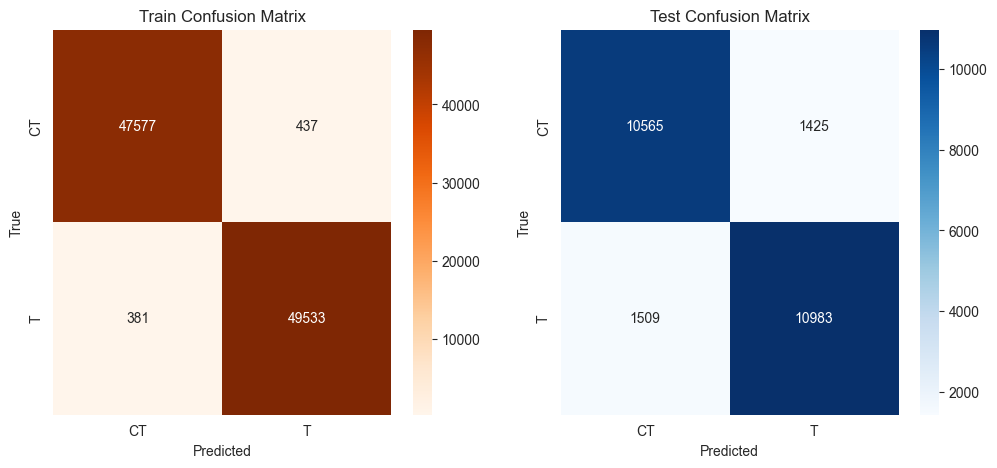

In [178]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.5. GradientBoostingClassifier

In [179]:
# Initialize the Decision Tree classifier
gb_classifier = GradientBoostingClassifier(random_state=25)

# Train the classifier
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=25)

In [180]:
y_pred_train = gb_classifier.predict(X_train)
y_pred_test = gb_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7561473735805898; Test acc 0.7561882199166735


In [181]:
print(report)

              precision    recall  f1-score   support

          CT       0.74      0.78      0.76     11990
           T       0.78      0.73      0.75     12492

    accuracy                           0.76     24482
   macro avg       0.76      0.76      0.76     24482
weighted avg       0.76      0.76      0.76     24482



Text(627.9949494949494, 0.5, 'True')

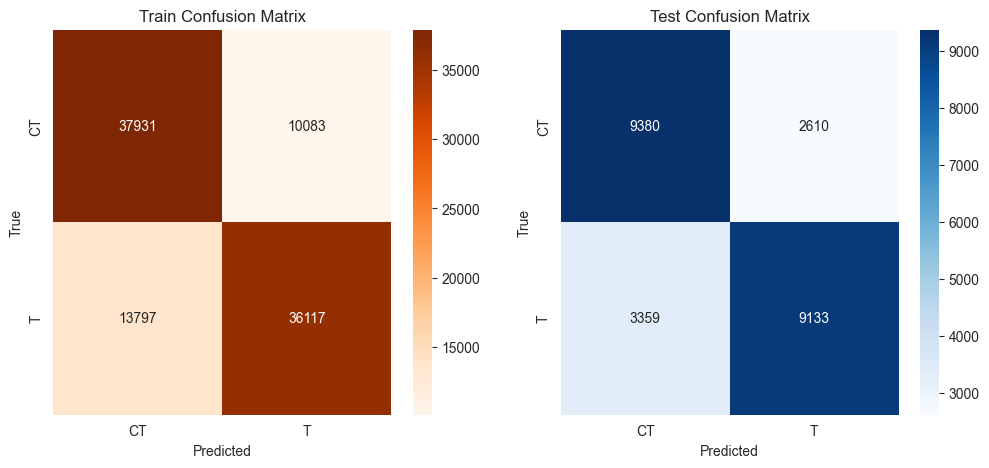

In [182]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.5.1 Adjust parameters

In [183]:
# Define ranges for hyperparameters
n_estimators_range = range(20, 101, 10)  # range for n_estimators
max_depth_range = range(2, 5)  # range for max_depth

# Initialize lists to store accuracies
accuracies = []

# Loop over n_estimators
for n_estimators in n_estimators_range:
    temp_accuracies = []
    # Loop over max_depth
    for max_depth in max_depth_range:
        # Initialize and train the model
        gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth)
        gb.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred_train = gb.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred_train)
        temp_accuracies.append(accuracy)

    accuracies.append(temp_accuracies)

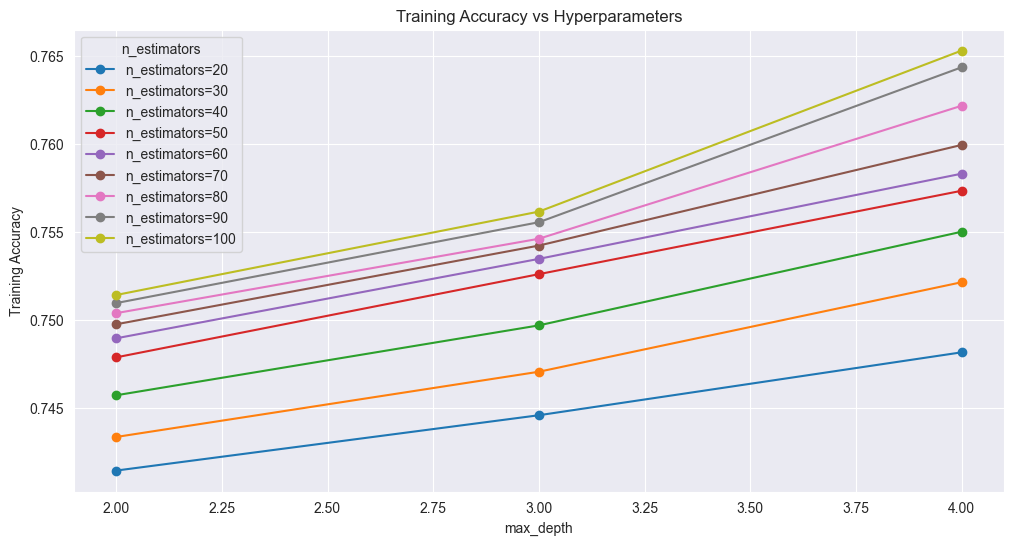

In [184]:
# Plot the results
plt.figure(figsize=(12, 6))

for i, n_estimators in enumerate(n_estimators_range):
    plt.plot(max_depth_range, accuracies[i], marker='o', label=f'n_estimators={n_estimators}')

plt.title('Training Accuracy vs Hyperparameters')
plt.xlabel('max_depth')
plt.ylabel('Training Accuracy')
plt.legend(title='n_estimators')
plt.grid(True)
plt.show()

### 5.5.2 Use Adjusted Parameters

In [185]:
gb_classifier = GradientBoostingClassifier(random_state=25, n_estimators=100, max_depth=4)

# Train the classifier
gb_classifier.fit(X_train, y_train)

y_pred_train = gb_classifier.predict(X_train)
y_pred_test = gb_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7652969528633281; Test acc 0.763663099419982


In [186]:
print(report)

              precision    recall  f1-score   support

          CT       0.74      0.79      0.77     11990
           T       0.78      0.74      0.76     12492

    accuracy                           0.76     24482
   macro avg       0.76      0.76      0.76     24482
weighted avg       0.76      0.76      0.76     24482



Text(627.9949494949494, 0.5, 'True')

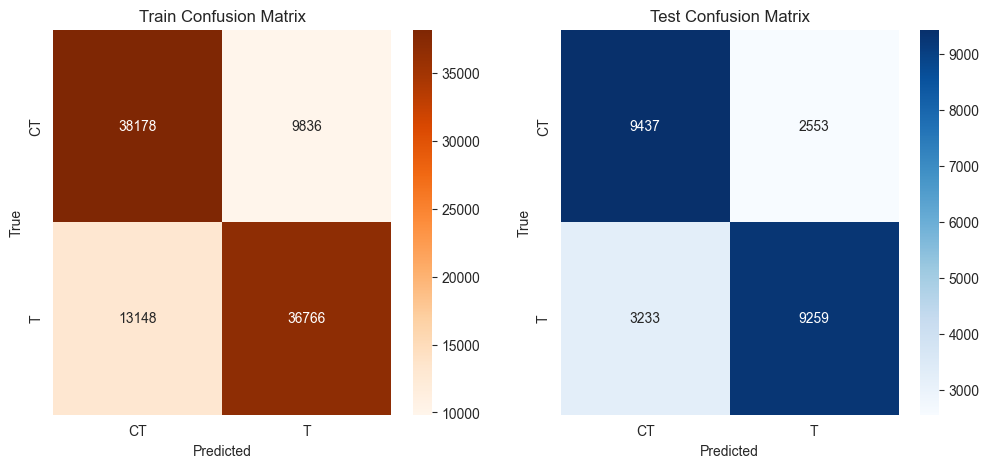

In [187]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.6. AdaBoostClassifier

In [188]:
# Initialize the Decision Tree classifier
ada_classifier = AdaBoostClassifier(random_state=25)

# Train the classifier
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=25)

In [189]:
y_pred_train = ada_classifier.predict(X_train)
y_pred_test = ada_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7425863900008169; Test acc 0.7464259455926804


In [190]:
print(report)

              precision    recall  f1-score   support

          CT       0.75      0.73      0.74     11990
           T       0.75      0.76      0.75     12492

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



Text(627.9949494949494, 0.5, 'True')

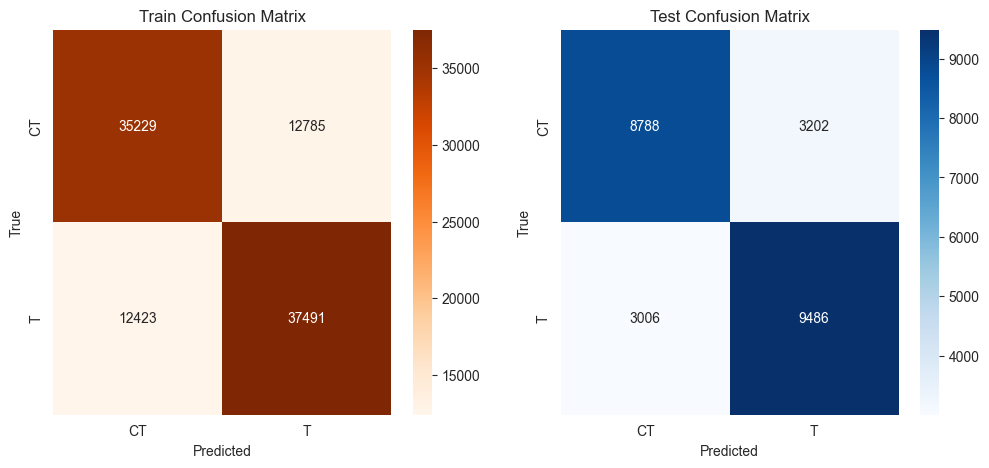

In [191]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

### 5.6.1 Adjust parameter

In [192]:
# Define ranges for hyperparameters
n_estimators_range = range(1, 100, 1)  # range for n_estimators

# Initialize lists to store accuracies
accuracies = []

# Loop over n_estimators
for n_estimators in n_estimators_range:
    # Initialize and train the model
    gb = AdaBoostClassifier(n_estimators=n_estimators)
    gb.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_train = gb.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    accuracies.append(accuracy)

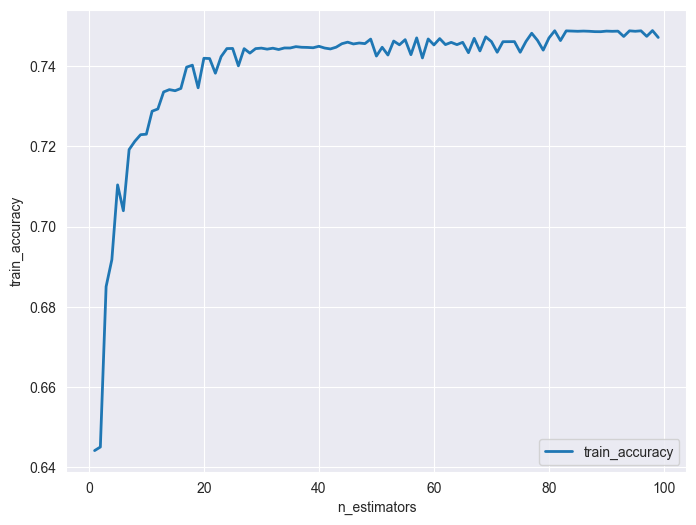

In [193]:
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, accuracies, lw=2,
             label='train_accuracy')
plt.xlabel('n_estimators')
plt.ylabel('train_accuracy')
plt.legend(loc="lower right")
plt.show()

### 5.6.2 Use Adjusted Parameter

In [194]:
ada_classifier = AdaBoostClassifier(random_state=25, n_estimators=85)

# Train the classifier
ada_classifier.fit(X_train, y_train)

y_pred_train = ada_classifier.predict(X_train)
y_pred_test = ada_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=["CT", "T"])

print(f"Train acc {train_acc}; Test acc {test_acc}")

Train acc 0.7487746099174905; Test acc 0.7499795768319582


In [195]:
print(report)

              precision    recall  f1-score   support

          CT       0.73      0.78      0.75     11990
           T       0.77      0.72      0.75     12492

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



Text(627.9949494949494, 0.5, 'True')

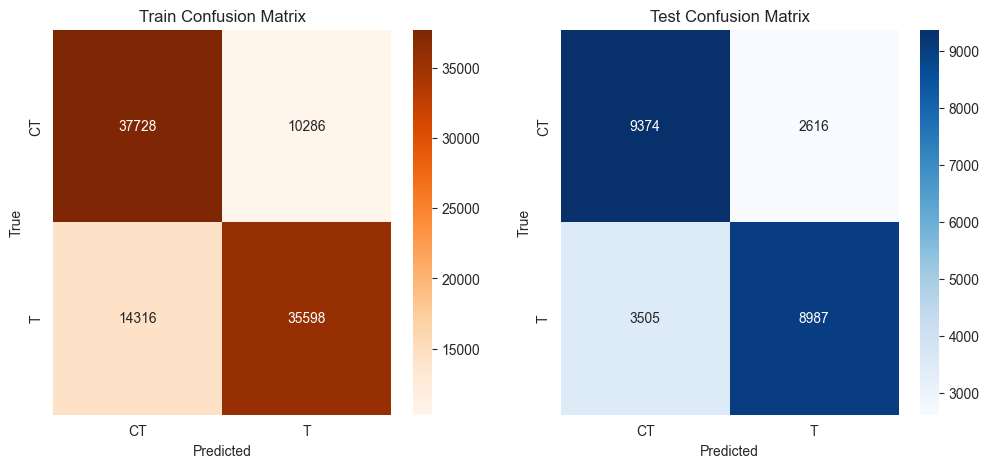

In [196]:
# Compute the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plot Train confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges', ax=axes[0], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot Test confusion matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=["CT", "T"], yticklabels=["CT", "T"])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')